In [1]:
import yt
import os
import numpy as np
import matplotlib.pyplot as plt

def KlebeRichtigZusammen(ad, var):
  xs = [float(grid.LeftEdge[0]) for grid in ad.index.grids]
  enumerated = list(enumerate(xs))
  sorted_keys = [k for (k,v) in sorted(enumerated, key=lambda xs: xs[1])]
  grids = [np.array(ad.index.grids[k][var]) for k in sorted_keys]
  grids = [x.reshape((x.shape[0],)) for x in grids]
  p = np.concatenate(grids)
  return p

def PrintProgress(i, plotfiles):
  ny = len(plotfiles)
  progress = int(100.0 * float(i) / (ny - 1))
  print('[{:3d}%] Reading plotfile {}'.format(progress, plotfiles[i]))

yt.funcs.mylog.setLevel(50)
#output_dir = '/group/ag_klima/SFB1029_C01/SEC_Plenum/Plotfiles/Tube1'
#output_dir = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1'
#output_dir = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Debug/SEC_Plenum_HLLEM_Larrouturou_Upwind/Plotfiles/Tube0'
#output_dir = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_HLLEM_Larrouturou_Upwind/Plotfiles/Tube1'
#output_dir = '/group/ag_klima/SFB1029_C01/SEC_Plenum/SEC_Plenum_HLLEM_Larrouturou_MinMod/highres2/Plotfiles/Tube1'
output_dir = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum/average_mirror_state/Plotfiles/Tube1'

dirs = os.listdir(output_dir)
plotfiles = ['{}/{}'.format(output_dir, plt) for plt in dirs]
list.sort(plotfiles)
plotfiles = plotfiles[::2]
# plotfiles = plotfiles[0:2]
ds = yt.load(plotfiles[1])

ad = ds.all_data()
p = KlebeRichtigZusammen(ad, 'Pressure')
F = KlebeRichtigZusammen(ad, 'Species_0')
FR = KlebeRichtigZusammen(ad, 'Species_1')

nx = p.shape[0]
ny = len(plotfiles)

#PrintProgress(0, plotfiles)
x0 = ad.index.grids[0].LeftEdge[0]
xEnd = ad.index.grids[-1].RightEdge[0]
ts = np.zeros((ny,1))
ts[0] = ds.current_time
imdata = np.zeros(shape=(nx, ny, 3))
imdata[:,0, 0] = p
imdata[:,0, 1] = F
imdata[:,0, 2] = FR

for i in range(1,ny):
  # PrintProgress(i, plotfiles)
  ds = yt.load(plotfiles[i])
  ad = ds.all_data()
  p = KlebeRichtigZusammen(ad, 'Pressure')
  F = KlebeRichtigZusammen(ad, 'Species_0')
  FR = KlebeRichtigZusammen(ad, 'Species_1')
  imdata[:,i,0] = p
  imdata[:,i,1] = F
  imdata[:,i,2] = FR
  ts[i] = ds.current_time


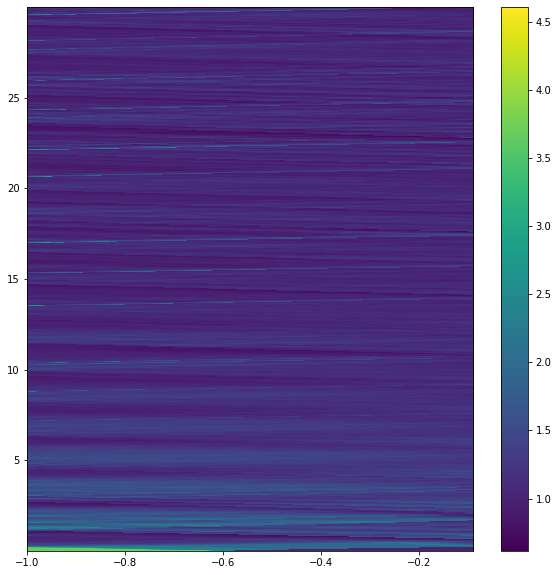

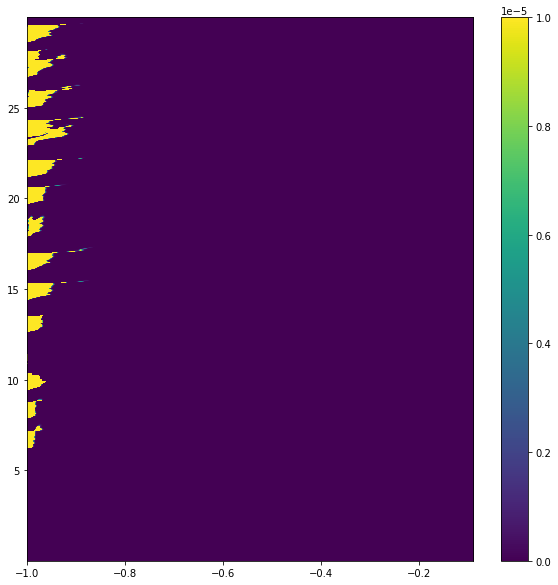

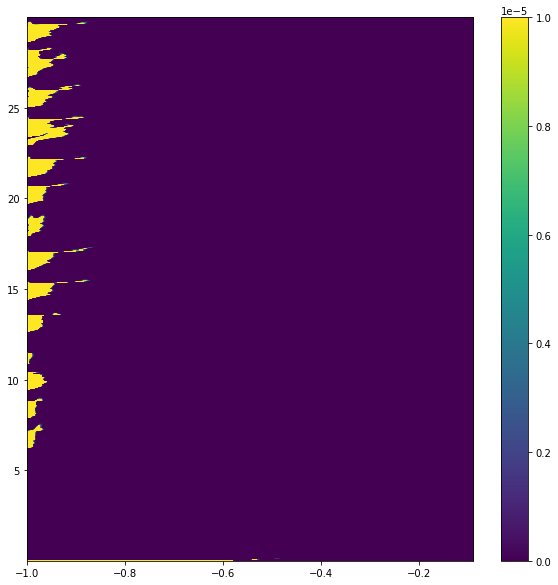

In [2]:
import matplotlib.pyplot as plt

#plt.plot(imdata[:,1])
f = plt.figure(figsize=(10, 10))
im = plt.imshow(imdata[:,:,0].T, origin='lower', interpolation='none', extent=(x0, xEnd, ts[0], ts[-1]), aspect='auto')
plt.colorbar(im)
plt.show()

f = plt.figure(figsize=(10, 10))
im = plt.imshow(imdata[:,:,1].T, vmin=0.0, vmax=1e-5, origin='lower', interpolation='none', extent=(x0, xEnd, ts[0], ts[-1]), aspect='auto')
plt.colorbar(im)
plt.show()

f = plt.figure(figsize=(10, 10))
im = plt.imshow(imdata[:,:,2].T, vmin=0.0, vmax=1e-5, origin='lower', interpolation='none', extent=(x0, xEnd, ts[0], ts[-1]), aspect='auto')
plt.colorbar(im)
plt.show()

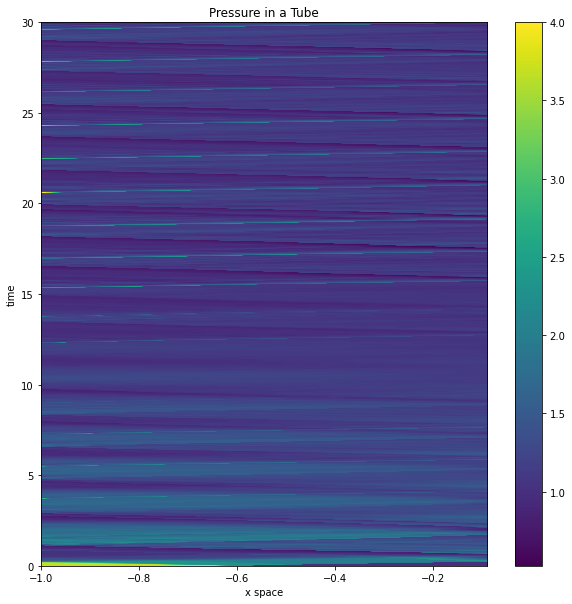

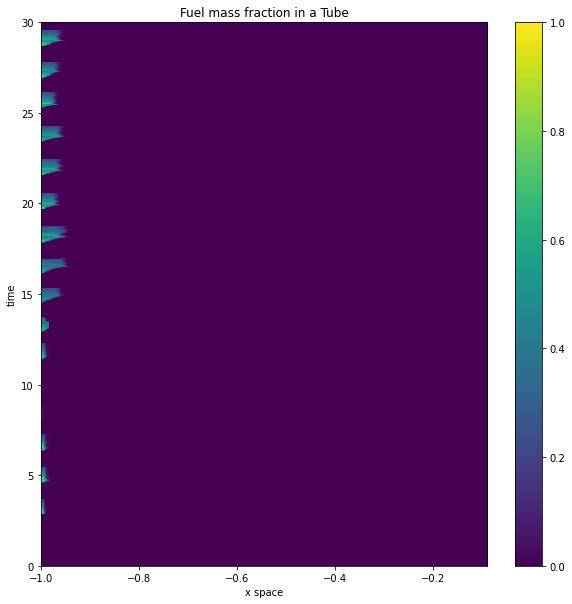

In [22]:
  import numpy as np
  import matplotlib.pyplot as plt
  
  tube_id = 0
  output_base_dir = '/group/ag_klima/SFB1029_C01/SEC_Plenum/average_inner_state'
  imdata = np.load('{}/Tube{}.npy'.format(output_base_dir, tube_id))
  x0 = -1.0
  xEnd = -0.09
  t0 = 0.0
  tEnd = 30.0
  f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
  im = ax.imshow(imdata[:,:,0].T, vmax=4.0, origin='lower', interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
  ax.set(ylabel='time', xlabel='x space', title='Pressure in a Tube')
  plt.colorbar(im, ax=ax)
  f.savefig('{}/Tube{}_pressure.png'.format(output_base_dir, tube_id))
  plt.show()
  f.clear()
  plt.close(f)

  f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
  im = ax.imshow(imdata[:,:,1].T, vmin=0.0, vmax=1, origin='lower', interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
  ax.set(ylabel='time', xlabel='x space', title='Fuel mass fraction in a Tube')
  plt.colorbar(im, ax=ax)
  f.savefig('{}/Tube{}_fuel.png'.format(output_base_dir, tube_id))
  plt.show()

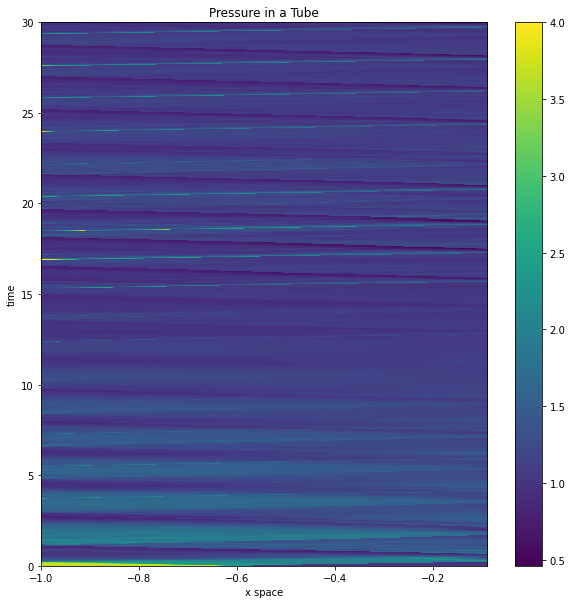

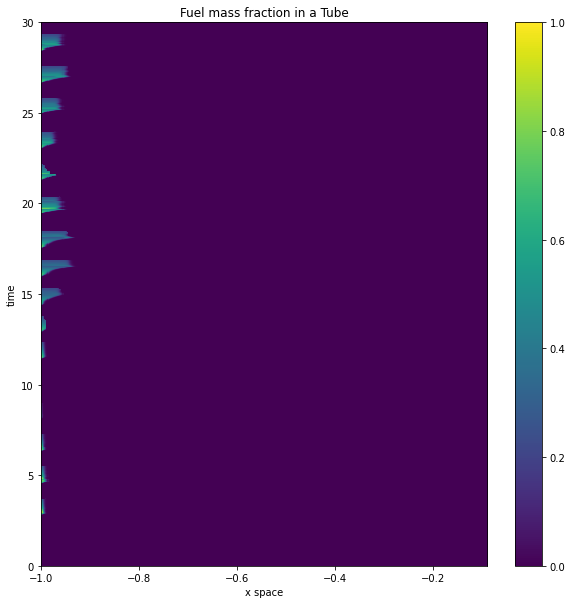

In [20]:
  import numpy as np
  import matplotlib.pyplot as plt
  
  tube_id = 0
  output_base_dir = '/group/ag_klima/SFB1029_C01/SEC_Plenum/average_outer_state'
  imdata = np.load('{}/Tube{}.npy'.format(output_base_dir, tube_id))
  x0 = -1.0
  xEnd = -0.09
  t0 = 0.0
  tEnd = 30.0
  f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
  im = ax.imshow(imdata[:,:,0].T, vmax=4.0, origin='lower', interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
  ax.set(ylabel='time', xlabel='x space', title='Pressure in a Tube')
  plt.colorbar(im, ax=ax)
  f.savefig('{}/Tube{}_pressure.png'.format(output_base_dir, tube_id))
  plt.show()
  f.clear()
  plt.close(f)

  f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
  im = ax.imshow(imdata[:,:,1].T, vmin=0.0, vmax=1, origin='lower', interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
  ax.set(ylabel='time', xlabel='x space', title='Fuel mass fraction in a Tube')
  plt.colorbar(im, ax=ax)
  f.savefig('{}/Tube{}_fuel.png'.format(output_base_dir, tube_id))
  plt.show()

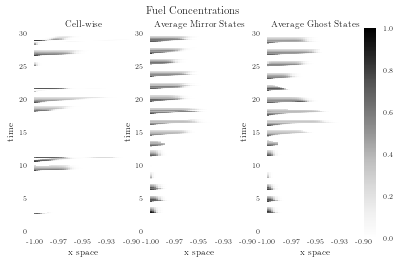

In [8]:
import numpy as np
import matplotlib.pyplot as plt
  

def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

#plt.style.use('seaborn')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "axes.titlesize": 9,
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
}

plt.rcParams.update(tex_fonts)
plt.rcParams.update({'axes.grid' : False})

tube_id = 0
output_base_dir1 = '/group/ag_klima/SFB1029_C01/SEC_Plenum/average_outer_state'
imdata1 = np.load('{}/Tube{}.npy'.format(output_base_dir1, tube_id))
output_base_dir2 = '/group/ag_klima/SFB1029_C01/SEC_Plenum/average_inner_state'
imdata2 = np.load('{}/Tube{}.npy'.format(output_base_dir2, tube_id))
output_base_dir3 = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum/cellwise'
imdata3 = np.load('{}/Tube{}.npy'.format(output_base_dir3, tube_id))
x0 = -1.0
xEnd = -0.09
t0 = 0.0
tEnd = 30.0
f, ax = plt.subplots(nrows=1, ncols=3, figsize=set_size('thesis'))
im1 = ax[2].imshow(imdata1[:,:,1].T, vmin=0.0, vmax=1, origin='lower', interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
im2 = ax[1].imshow(imdata2[:,:,1].T, vmin=0.0, vmax=1, origin='lower', interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
im3 = ax[0].imshow(imdata3[:,:,1].T, vmin=0.0, vmax=1, origin='lower', interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
ax[0].set(ylabel='time', xlabel='x space', title='Cell-wise', xlim=[-1.0, -0.9])
ax[1].set(ylabel='time', xlabel='x space', title='Average Mirror States', xlim=[-1.0, -0.9])
ax[2].set(ylabel='time', xlabel='x space', title='Average Ghost States', xlim=[-1.0, -0.9])

from matplotlib.ticker import FormatStrFormatter
for a in ax:
  a.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#plt.colorbar(im1, ax=ax[0])
cax = f.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im2, cax=cax)
f.suptitle('Fuel Concentrations')
f.savefig('{}/Tube{}_fuels.pdf'.format(output_base_dir1, tube_id))
plt.show()
f.clear()
plt.close(f)
  